In [1]:
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt


2025-06-13 23:48:32.255150: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-13 23:48:32.264047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-13 23:48:32.286566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749883712.322334    2294 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749883712.331353    2294 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-13 23:48:32.379116: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
Image_size = 256
Batch_size = 32
Channels = 3
Epoch = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/ayush/ishu/potato-disease/traning/PlantVillage",
    shuffle = True,
    image_size = (Image_size , Image_size),
    batch_size = Batch_size
    
    
)

Found 2152 files belonging to 3 classes.


2025-06-13 23:48:38.416486: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)


68

2025-06-13 23:48:38.778078: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


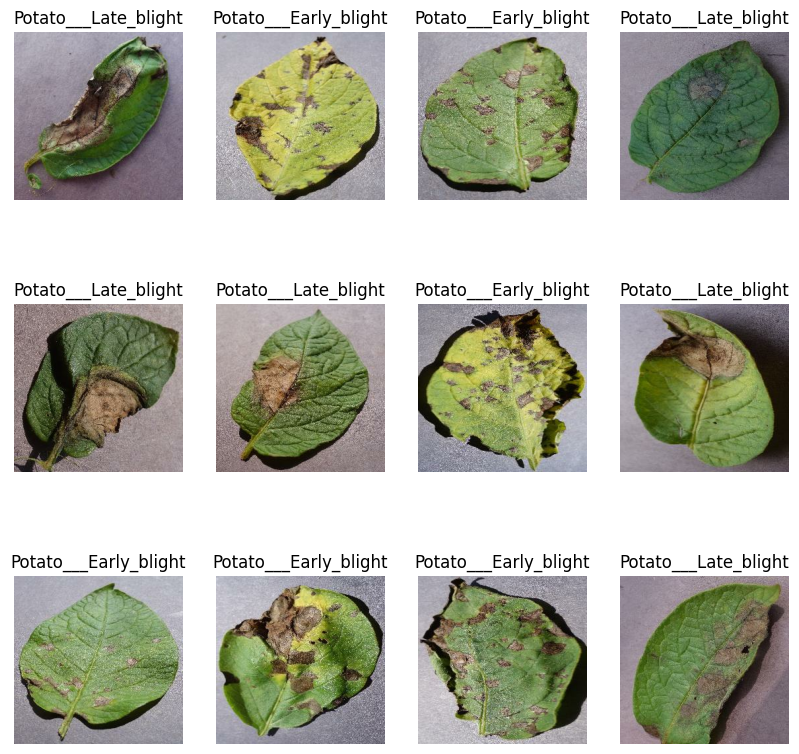

In [6]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
# 80% => training
# 20% => 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds
    )

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds =test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [20]:
# resize_and_rescale= tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(Image_size,Image_size),
#     layers.experimental.preprocessin.Rescaling(1.0/255)
    
# ])

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0/255)
])

In [21]:
# data_augmentation =tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation
# ])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)  # specify rotation factor (e.g., 0.2 for 20%)
])

In [22]:
input_shape = (Image_size,Image_size,Batch_size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape =input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
])
model.build(input_shape =input_shape)

/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (256, 256, 256, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (256, 256, 256, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (256, 254, 254, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (256, 127, 127, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (256, 125, 125, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (256, 62, 62, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (256, 60, 60, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (256, 30, 30, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (256, 28, 28, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (256, 14, 14, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (256, 12, 12, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (256, 6, 6, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (256, 4, 4, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (256, 2, 2, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (256, 256)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (256, 64)              │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (256, 3)               │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= "False"),
    metrics =["accuracy"]
)

In [30]:
history = model.fit(
    train_ds,
    epochs = Epoch,
    batch_size = Batch_size,
    verbose = 1,
    validation_data= val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4724 - loss: 0.9311 - val_accuracy: 0.4688 - val_loss: 0.8869
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5185 - loss: 0.8514 - val_accuracy: 0.7083 - val_loss: 0.6638
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7324 - loss: 0.5785 - val_accuracy: 0.8177 - val_loss: 0.5681
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8839 - loss: 0.3132 - val_accuracy: 0.8021 - val_loss: 0.5154
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8928 - loss: 0.2971 - val_accuracy: 0.9062 - val_loss: 0.2247
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9142 - loss: 0.2160 - val_accuracy: 0.9010 - val_loss: 0.2468
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9195 - loss: 0.2014 - val_accuracy: 0.8906 - val_loss: 0.3256
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9222 - loss: 0.1963 - val_accuracy: 0.9271 - val_loss:

In [26]:
scores = model.evaluate(test_ds)

/home/ayush/miniconda3/envs/mlaz/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.4827 - loss: 1.1044


In [27]:
scores

[1.1001018285751343, 0.5129310488700867]

In [28]:
history

import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib.pyplot as plt
Image_size = 256
Batch_size = 32
Channels = 3
Epoch = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/ayush/ishu/potato-disease/traning/PlantVillage",
    shuffle = True,
    image_size = (Image_size , Image_size),
    batch_size = Batch_size
    
    
)
class_names = dataset.class_names
class_names
len(dataset)
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")
len(dataset)
# 80% => training
# 20% => 10% validation, 10% test
train_size = 0.8
len(dataset)*train_size
train_ds = dataset.take(54)
len(train_ds
    )
test_ds = dataset.skip(54)
len(test_ds)
val_size = 0.1
len(dataset)*val_size
val_ds =test_ds.take(6)
len(val_ds)
test_ds = test_ds.skip(6)
l

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history["accuracy"]

[0.4756944477558136,
 0.5891203880310059,
 0.7789351940155029,
 0.8848379850387573,
 0.8998842835426331,
 0.9126157164573669,
 0.9195601940155029,
 0.9253472089767456,
 0.9340277910232544,
 0.9363425970077515,
 0.9444444179534912,
 0.9467592835426331,
 0.9351851940155029,
 0.9432870149612427,
 0.9606481194496155,
 0.9646990895271301,
 0.9589120149612427,
 0.9577546119689941,
 0.9542824029922485,
 0.9612268805503845,
 0.9618055820465088,
 0.9583333134651184,
 0.9646990895271301,
 0.9756944179534912,
 0.9467592835426331,
 0.9693287014961243,
 0.9751157164573669,
 0.9710648059844971,
 0.96875,
 0.9785879850387573,
 0.9774305820465088,
 0.9826388955116272,
 0.9797453880310059,
 0.9832175970077515,
 0.9832175970077515,
 0.9855324029922485,
 0.9861111044883728,
 0.9918981194496155,
 0.9855324029922485,
 0.9872685074806213,
 0.9722222089767456,
 0.9866898059844971,
 0.9832175970077515,
 0.9728009104728699,
 0.9809027910232544,
 0.9884259104728699,
 0.9907407164573669,
 0.9872685074806213,
 0.

In [34]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

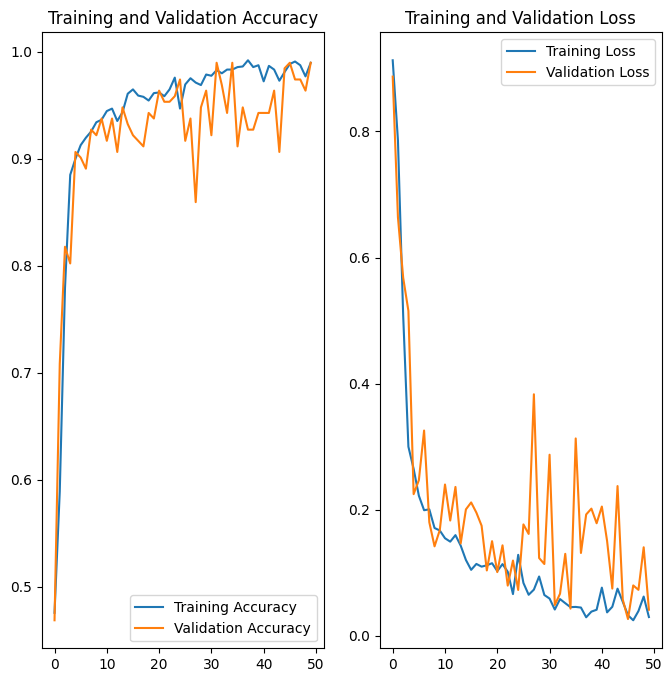

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epoch), acc, label='Training Accuracy')
plt.plot(range(Epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epoch), loss, label='Training Loss')
plt.plot(range(Epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
predicted label: Potato___Early_blight


2025-06-14 00:59:43.549878: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


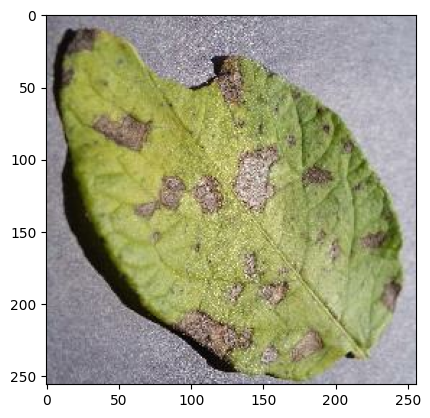

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


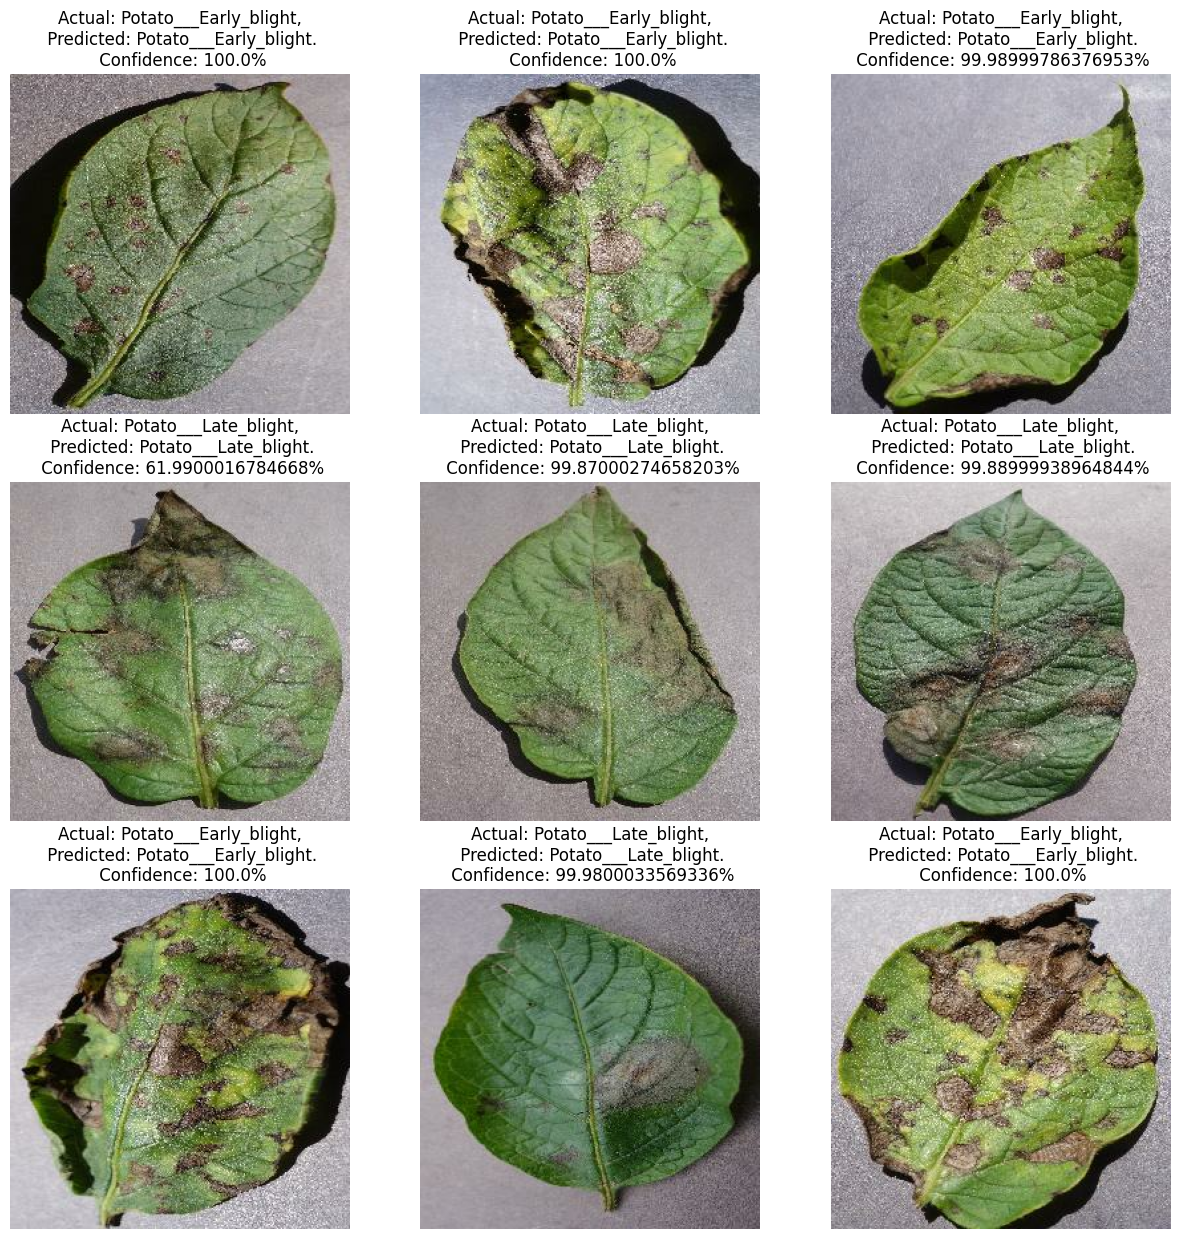

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
import os
import tensorflow as tf

model_base_dir = "/home/ayush/ishu/potato-disease/model/potatoes_model"
version = "1"
export_path = os.path.join(model_base_dir, version)

# Make sure it's a proper tf.keras.Model
assert isinstance(model, tf.keras.Model), "Model is not a tf.keras.Model!"

# Save in SavedModel format
tf.saved_model.save(model, export_path)

print(f"✅ Model saved for TensorFlow Serving at: {export_path}")



TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [ ]:
# import os

# # Get the next model version number
# model_version = max([int(i) for i in os.listdir("../models") if i.isdigit()] + [0]) + 1

# # Create the full path with a valid extension
# model_path = f"../models/{model_version}.keras"

# # Save the model
# model.save(model_path)


